In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math

In [17]:
df_players = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Social%20Power%20NBA/nba_2017_players_with_salary_wiki_twitter.csv", index_col=0)
df_players.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [18]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rk                      239 non-null    int64  
 1   PLAYER                  239 non-null    object 
 2   POSITION                239 non-null    object 
 3   AGE                     239 non-null    int64  
 4   MP                      239 non-null    float64
 5   FG                      239 non-null    float64
 6   FGA                     239 non-null    float64
 7   FG%                     239 non-null    float64
 8   3P                      239 non-null    float64
 9   3PA                     239 non-null    float64
 10  3P%                     232 non-null    float64
 11  2P                      239 non-null    float64
 12  2PA                     239 non-null    float64
 13  2P%                     239 non-null    float64
 14  eFG%                    239 non-null    fl

In [19]:
df_players['TWITTER_FAVORITE_COUNT'] = df_players['TWITTER_FAVORITE_COUNT'].fillna(0)
df_players['TWITTER_RETWEET_COUNT'] = df_players['TWITTER_RETWEET_COUNT'].fillna(0)

In [20]:
df_sorted = df_players.sort_values(by='SALARY_MILLIONS', ascending=False)
df_sorted.head(5)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,...,1.93,8.42,20.43,18.3,98.38,51,30.96,14704.0,5533.5,1501.5
23,29,Mike Conley,PG,29,33.2,6.7,14.6,0.460,2.5,6.1,...,-0.20,4.47,10.50,16.0,94.64,35,26.54,11.0,257.5,90.0
60,78,Al Horford,C,30,32.3,5.6,11.8,0.473,1.3,3.6,...,1.06,1.82,6.93,12.5,98.96,46,26.54,870.0,136.0,71.0
9,12,Kevin Durant,SF,28,33.4,8.9,16.5,0.537,1.9,5.0,...,1.33,5.74,12.24,18.6,103.71,51,26.50,6288.5,1425.5,366.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5


In [21]:
df_sorted = df_players.sort_values(by='SALARY_MILLIONS', ascending=True)
df_sorted.head(5)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
238,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,0.2,...,0.43,-1.68,0.08,0.8,104.33,4,0.06,109.0,0.0,0.0
204,373,Anthony Brown,SF,24,14.5,1.6,4.5,0.360,0.6,2.5,...,-0.34,-1.76,0.08,5.8,94.67,3,0.06,11.0,3.0,3.0
218,400,Jarrett Jack,PG,33,16.5,1.0,1.5,0.667,0.0,0.5,...,0.01,-1.84,0.03,5.1,97.67,1,0.06,245.5,11.5,7.0
219,405,Andrew Bogut,C,32,21.6,1.4,3.0,0.469,0.0,0.0,...,4.34,0.33,1.20,9.2,93.14,8,0.24,1435.5,57.0,4.0
232,452,Lamar Patterson,SG,25,8.0,0.6,3.0,0.200,0.2,1.2,...,0.62,-1.61,0.03,-0.4,93.96,1,0.25,82.0,4.0,4.0


In [22]:
print('Mean salary is %.3f' % df_players['SALARY_MILLIONS'].mean())
print('Standard deviation of the salary is %.3f' % df_players['SALARY_MILLIONS'].std())

Mean salary is 8.092
Standard deviation of the salary is 6.956


In [23]:
df_sorted = df_players.sort_values(by='RPM', ascending=False)
df_sorted.head(5)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,...,1.93,8.42,20.43,18.3,98.38,51,30.96,14704.0,5533.5,1501.5
33,42,Chris Paul,PG,31,31.5,6.1,12.9,0.476,2.0,5.0,...,2.76,7.92,13.48,18.2,98.19,43,22.87,2689.5,829.0,178.5
7,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10.0,...,0.14,7.41,18.80,15.1,105.08,65,12.11,17570.5,12278.0,2893.0
99,142,Draymond Green,PF,26,32.5,3.6,8.6,0.418,1.1,3.5,...,5.59,7.14,16.84,11.7,103.34,62,15.33,2946.0,627.0,168.5
6,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,5.2,...,1.25,7.08,15.53,17.4,95.79,54,17.64,2446.5,2701.5,716.5


In [24]:
df_players.columns

Index(['Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'TEAM', 'GP',
       'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE', 'PACE', 'W',
       'SALARY_MILLIONS', 'PAGEVIEWS', 'TWITTER_FAVORITE_COUNT',
       'TWITTER_RETWEET_COUNT'],
      dtype='object')

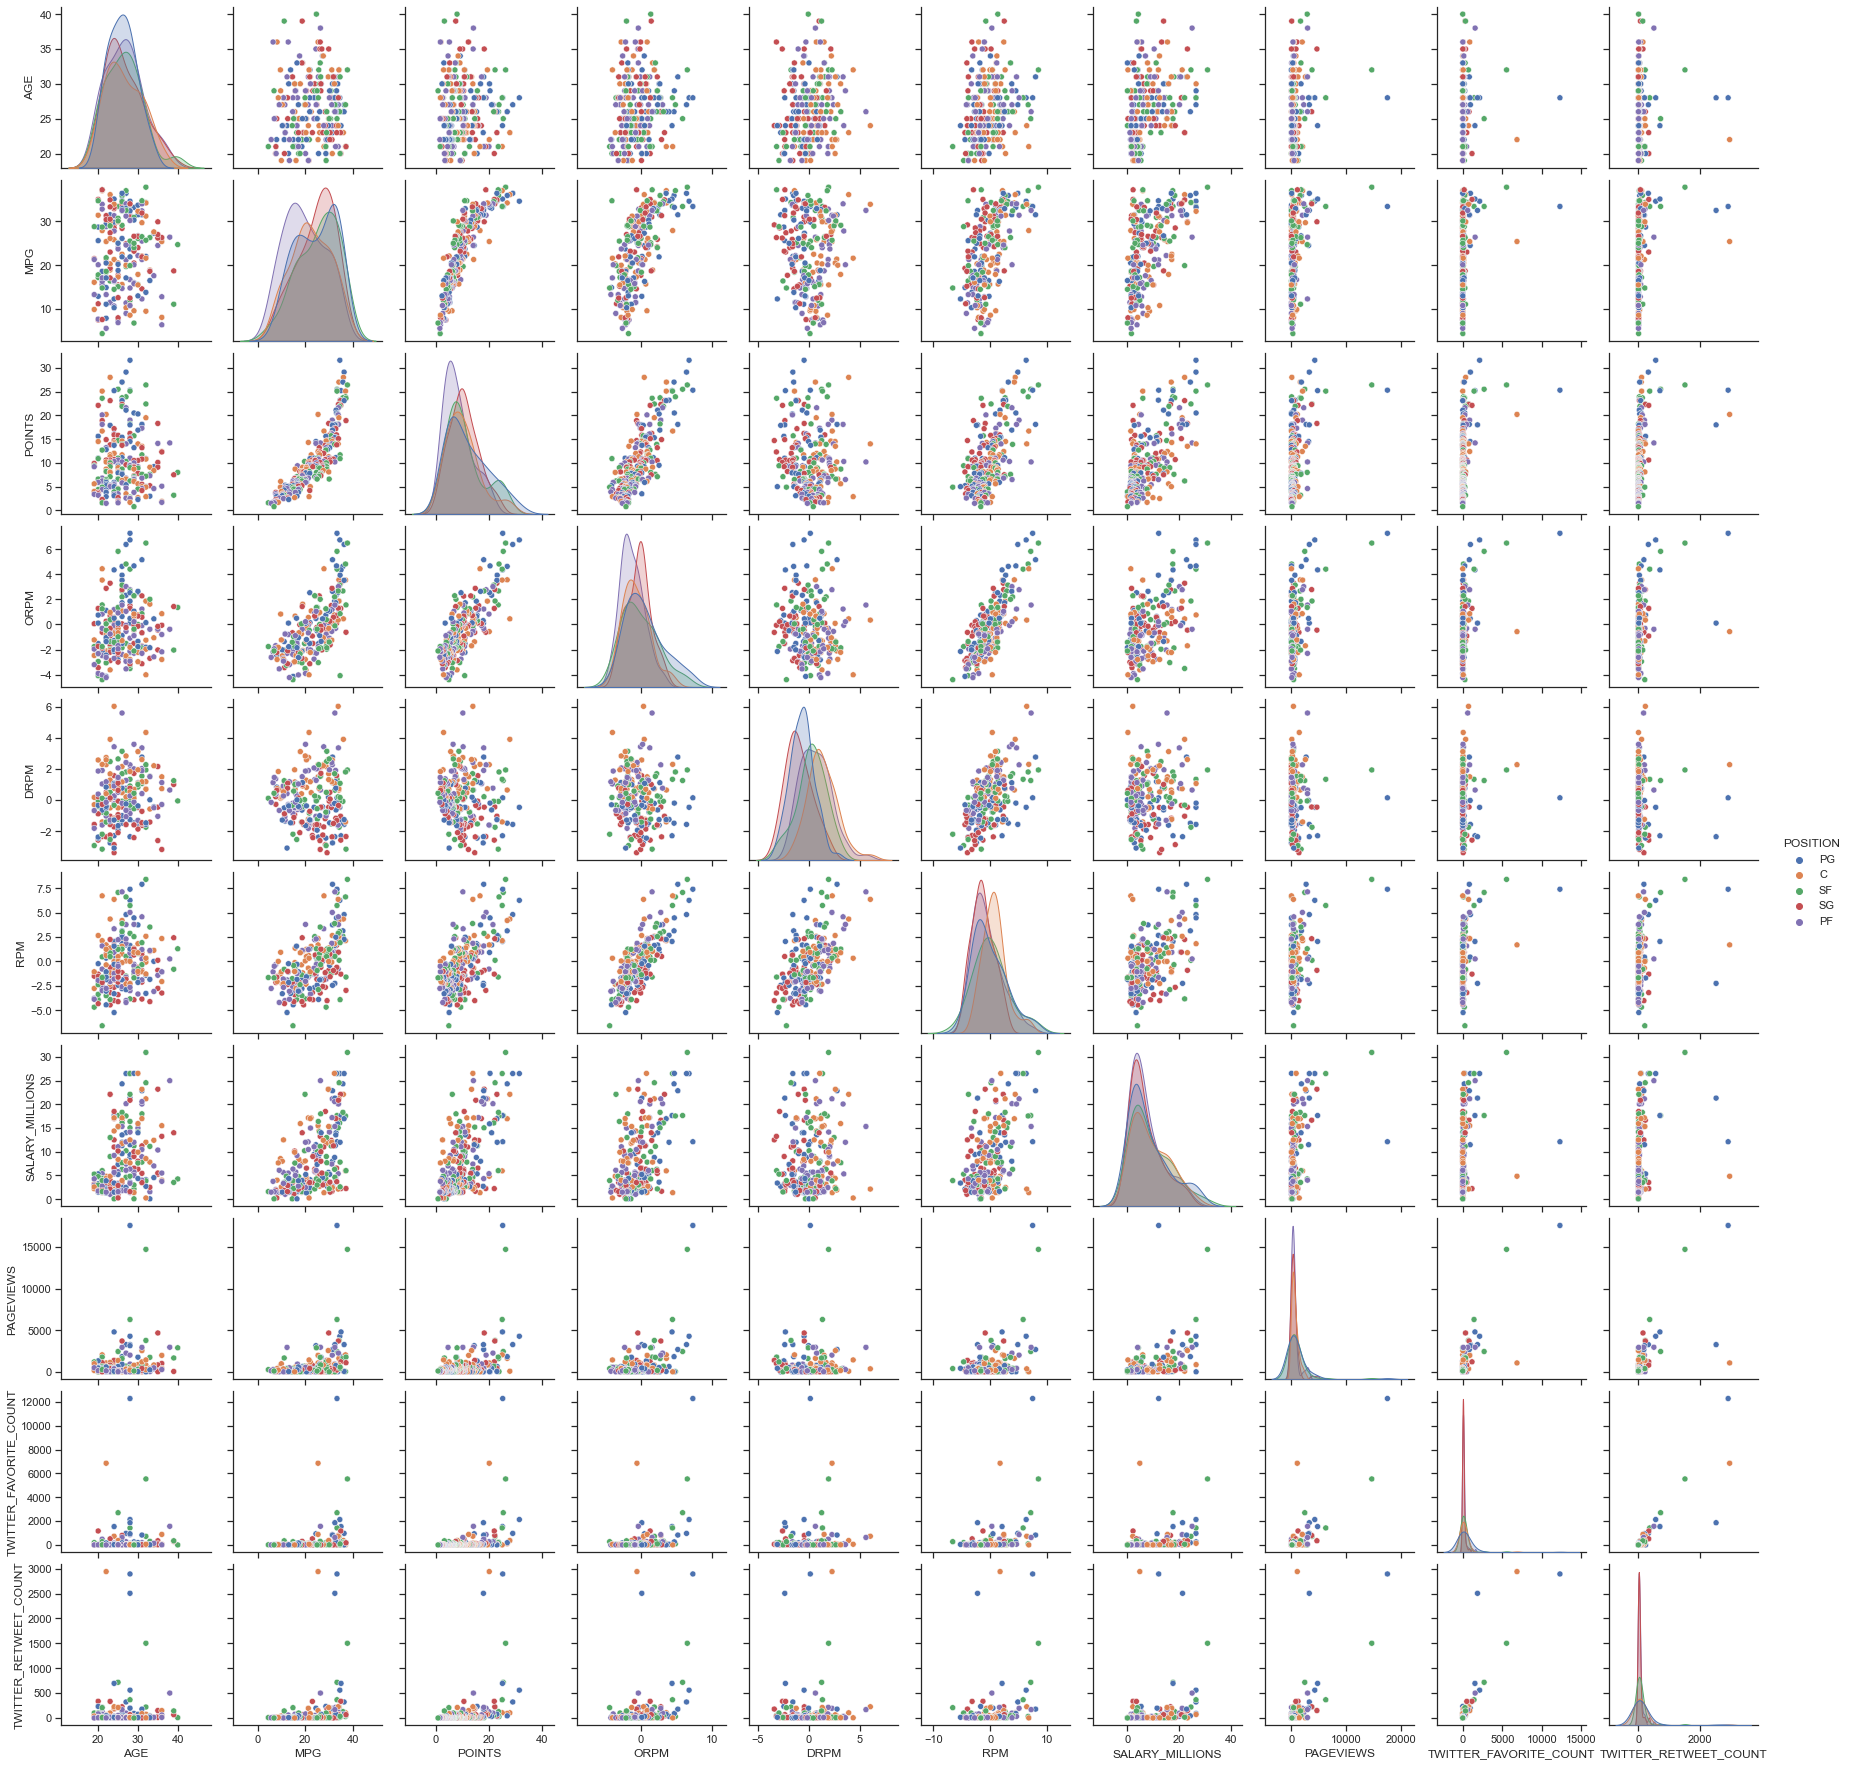

In [25]:
df_players = df_players[['PLAYER', 'POSITION', 'AGE', 'MPG', 'POINTS', 'ORPM', 'DRPM', 'RPM', 
                         'SALARY_MILLIONS', 'PAGEVIEWS', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT']]

df_temp = df_players.drop(columns=['PLAYER'])
sns.set(style="ticks")
sns.pairplot(df_temp, hue="POSITION")
plt.show()

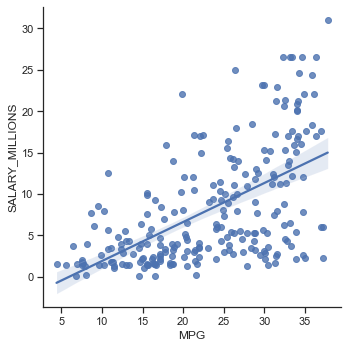

In [26]:
sns.lmplot(x="MPG", y="SALARY_MILLIONS", data=df_players)
plt.show()

In [27]:
X = df_players[['MPG']]
Y = df_players['SALARY_MILLIONS']
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.333


In [28]:
y_pred = lr_model.predict(X)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 5.668. Data STD is 6.956


In [30]:
corr, _ = pearsonr(df_players['MPG'], df_players['SALARY_MILLIONS'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.577


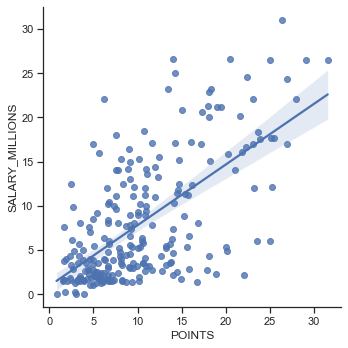

In [31]:
sns.lmplot(x="POINTS", y="SALARY_MILLIONS", data=df_players)
plt.show()

In [32]:
X = df_players[['POINTS']]
Y = df_players['SALARY_MILLIONS']
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.413


In [33]:
y_pred = lr_model.predict(X)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 5.316. Data STD is 6.956


In [34]:
corr, _ = pearsonr(df_players['POINTS'], df_players['SALARY_MILLIONS'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.643


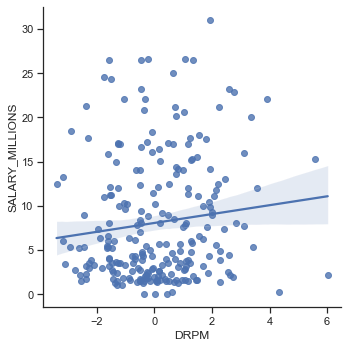

In [35]:
sns.lmplot(x="DRPM", y="SALARY_MILLIONS", data=df_players)
plt.show()

In [36]:
X = df_players[['DRPM']]
Y = df_players['SALARY_MILLIONS']
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.013


In [37]:
y_pred = lr_model.predict(X)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 6.894. Data STD is 6.956


In [38]:
corr, _ = pearsonr(df_players['DRPM'], df_players['SALARY_MILLIONS'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.116


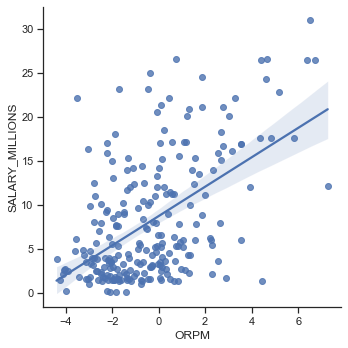

In [40]:
sns.lmplot(x="ORPM", y="SALARY_MILLIONS", data=df_players)
plt.show()

In [41]:
X = df_players[['ORPM']]
Y = df_players['SALARY_MILLIONS']
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.285


In [42]:
y_pred = lr_model.predict(X)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 5.869. Data STD is 6.956


In [43]:
corr, _ = pearsonr(df_players['ORPM'], df_players['SALARY_MILLIONS'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.534


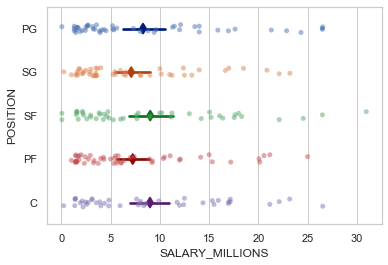

In [44]:
sns.set(style="whitegrid")
sns.stripplot(x="SALARY_MILLIONS", y="POSITION", order=['PG','SG','SF','PF','C'], data=df_players, alpha=.50)
sns.pointplot(x="SALARY_MILLIONS", y="POSITION", order=['PG','SG','SF','PF','C'], data=df_players, palette="dark", markers="d")
plt.show()

In [45]:
salary_pos = df_players[['SALARY_MILLIONS', 'POSITION']]
multi_comp = MultiComparison(salary_pos['SALARY_MILLIONS'], salary_pos['POSITION'])
print(multi_comp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     C     PF  -1.7513 0.7133 -5.6983 2.1957  False
     C     PG  -0.7076    0.9 -4.6902 3.2749  False
     C     SF   0.0249    0.9  -4.037 4.0867  False
     C     SG  -1.9055 0.6664 -5.9263 2.1153  False
    PF     PG   1.0437    0.9 -2.7491 4.8365  False
    PF     SF   1.7762 0.6907 -2.0997 5.6521  False
    PF     SG  -0.1542    0.9  -3.987 3.6787  False
    PG     SF   0.7325    0.9 -3.1796 4.6446  False
    PG     SG  -1.1979    0.9 -5.0673 2.6716  False
    SF     SG  -1.9304 0.6437 -5.8814 2.0206  False
---------------------------------------------------


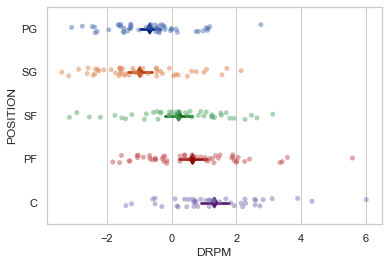

In [46]:
sns.set(style="whitegrid")
sns.stripplot(x="DRPM", y="POSITION", order=['PG','SG','SF','PF','C'], data=df_players, alpha=.50)
sns.pointplot(x="DRPM", y="POSITION", order=['PG','SG','SF','PF','C'], data=df_players, palette="dark", markers="d")
plt.show()

In [47]:
drpm_pg = df_players['DRPM'][df_players['POSITION']=='PG']
drpm_sg = df_players['DRPM'][df_players['POSITION']=='SG']
drpm_sf = df_players['DRPM'][df_players['POSITION']=='SF']
drpm_pf = df_players['DRPM'][df_players['POSITION']=='PF']
drpm_c = df_players['DRPM'][df_players['POSITION']=='C']
fstat, pval = f_oneway(drpm_pg, drpm_sf)
print('P Value: %.4f' % pval)

P Value: 0.0011


In [48]:
drpm_pos = df_players[['DRPM', 'POSITION']]
multi_comp = MultiComparison(drpm_pos['DRPM'], drpm_pos['POSITION'])
print(multi_comp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     C     PF  -0.6759 0.1271 -1.4601  0.1083  False
     C     PG  -1.9976  0.001 -2.7888 -1.2063   True
     C     SF  -1.1038  0.002 -1.9107 -0.2968   True
     C     SG  -2.3061  0.001 -3.1049 -1.5072   True
    PF     PG  -1.3217  0.001 -2.0752 -0.5681   True
    PF     SF  -0.4278 0.5396 -1.1979  0.3422  False
    PF     SG  -1.6301  0.001 -2.3916 -0.8687   True
    PG     SF   0.8938 0.0152  0.1166  1.6711   True
    PG     SG  -0.3085 0.7793 -1.0772  0.4603  False
    SF     SG  -1.2023  0.001 -1.9873 -0.4173   True
----------------------------------------------------


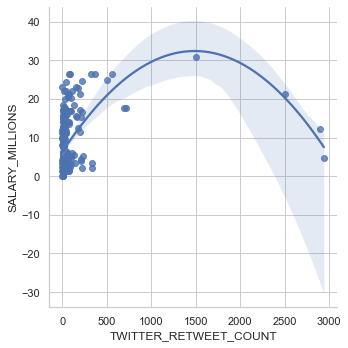

In [49]:
sns.lmplot(x="TWITTER_RETWEET_COUNT", y="SALARY_MILLIONS", order=2, data=df_players)
plt.show()

In [50]:
len_players = len(df_players)
q95 = df_players['TWITTER_RETWEET_COUNT'].quantile(0.95)
data = df_players[df_players['TWITTER_RETWEET_COUNT'] <= q95]
print('Removed %d players' % (len_players-len(data)))

Removed 12 players


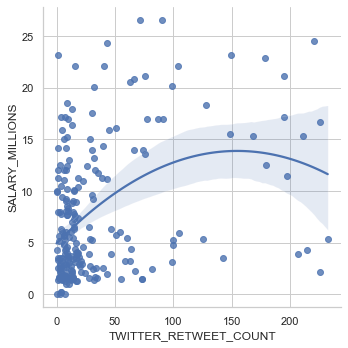

In [51]:
sns.lmplot(x="TWITTER_RETWEET_COUNT", y="SALARY_MILLIONS", order=2, data=data)
plt.show()

In [52]:
X = df_players[['TWITTER_RETWEET_COUNT']]
Y = df_players['SALARY_MILLIONS']
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X_, Y)
sc = lr_model.score(X_, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.235


In [53]:
y_pred = lr_model.predict(X_)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 6.070. Data STD is 6.956


In [55]:
corr, _ = pearsonr(df_players['TWITTER_RETWEET_COUNT'], df_players['SALARY_MILLIONS'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.241


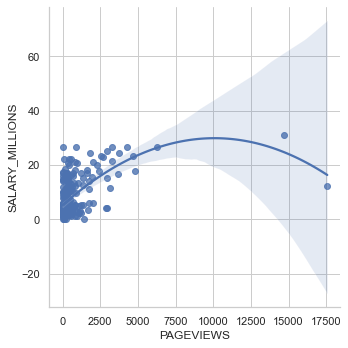

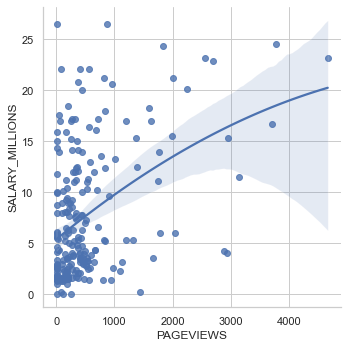

R2 score: 0.309


In [56]:
sns.lmplot(x="PAGEVIEWS", y="SALARY_MILLIONS", order=2, data=df_players)
plt.show()

sns.lmplot(x="PAGEVIEWS", y="SALARY_MILLIONS", order=2, data=data)
plt.show()

X = df_players[['PAGEVIEWS']]
Y = df_players['SALARY_MILLIONS']
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X_, Y)
sc = lr_model.score(X_, Y)
print('R2 score: %.3f' % sc)

In [57]:
y_pred = lr_model.predict(X_)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 5.769. Data STD is 6.956


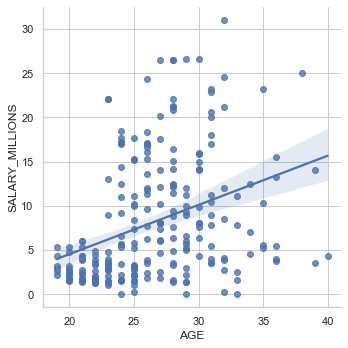

R2 score: 0.126


In [58]:
sns.lmplot(x="AGE", y="SALARY_MILLIONS", data=df_players)
plt.show()

X = df_players[['AGE']]
Y = df_players['SALARY_MILLIONS']
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

In [59]:
y_pred = lr_model.predict(X)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 6.489. Data STD is 6.956


In [60]:
corr, _ = pearsonr(df_players['AGE'], df_players['SALARY_MILLIONS'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.355


In [61]:
mapping = { "PG":1, "SG":2, "SF":3, "PF":4, "C":5}
df_players['POSITION_NUM'] = df_players['POSITION'].map(mapping).copy()
df_players

,PLAYER,POSITION,AGE,MPG,POINTS,ORPM,DRPM,RPM,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,POSITION_NUM
0,Russell Westbrook,PG,28,34.6,31.6,6.74,-0.47,6.27,26.50,4279.0,2130.5,559.0,1
1,James Harden,PG,27,36.4,29.1,6.38,-1.57,4.81,26.50,3279.0,969.0,321.5,1
2,Anthony Davis,C,23,36.1,28.0,0.45,3.90,4.35,22.12,82.5,368.0,104.0,5
3,DeMarcus Cousins,C,26,34.2,27.0,3.56,0.64,4.20,16.96,1625.5,102.0,91.5,5
4,Damian Lillard,PG,26,35.9,27.0,4.63,-1.49,3.14,24.33,1830.5,186.5,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Nick Collison,PF,36,6.4,1.7,-2.18,1.12,-1.06,3.75,283.5,10.0,12.0,4
235,Bruno Caboclo,SF,21,4.4,1.6,-1.76,0.11,-1.65,1.59,270.5,11.0,8.0,3
236,Ryan Kelly,PF,25,6.9,1.6,-1.94,1.45,-0.49,1.58,23.0,17.0,10.0,4
237,Jordan Mickey,PF,22,5.6,1.5,-2.62,-0.15,-2.77,1.47,129.5,0.0,3.0,4


In [62]:
X = df_players[['PAGEVIEWS', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT', 'MPG', 
                'POINTS', 'DRPM', 'ORPM', 'POSITION_NUM', 'AGE']]
Y = df_players['SALARY_MILLIONS']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
lr_model = LinearRegression(fit_intercept=True, normalize=True)
lr_model.fit(X_train, y_train)
sc = lr_model.score(X_train, y_train)
print('R2 score: %.3f' % sc)

R2 score: 0.603


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
lr_model = LinearRegression(fit_intercept=True, normalize=True)
lr_model.fit(X_train, y_train)
sc = lr_model.score(X_train, y_train)
print('R2 score: %.3f' % sc)

R2 score: 0.603


In [64]:
y_pred = lr_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 4.392. Data STD is 6.956


In [65]:
y_pred = lr_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 4.562. Data STD is 6.956


In [66]:
print(lr_model.coef_)

[ 0.00165687 -0.00360421  0.00448751 -0.01654636  0.71802991  0.38468031
 -0.16888746  0.3169563   0.48369419]


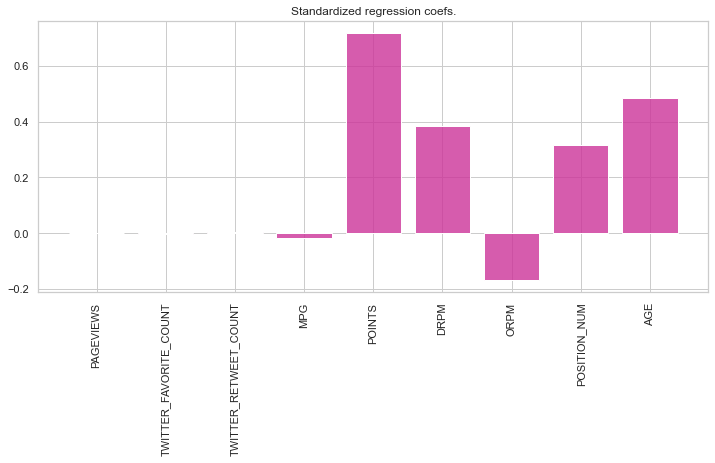

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(X.columns, lr_model.coef_, color=(0.8, 0.2, 0.6, 0.8))
plt.xticks(rotation=90)
plt.title('Standardized regression coefs.')
plt.show()

In [68]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.20, random_state=42)
lr_model_2 = LinearRegression(fit_intercept=True, normalize=True)
lr_model_2.fit(X_train, y_train)
sc = lr_model_2.score(X_train, y_train)
print('R2 score: %.3f' % sc)

R2 score: 0.781


In [69]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.20, random_state=42)
lr_model_2 = LinearRegression(fit_intercept=True, normalize=True)
lr_model_2.fit(X_train, y_train)
sc = lr_model_2.score(X_train, y_train)
print('R2 score: %.3f' % sc)

R2 score: 0.781


In [70]:
y_pred = lr_model_2.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 14.506. Data STD is 6.956


In [71]:
print(lr_model_2.coef_)

[ 1.38622178e-10  1.69848464e-02 -4.62136877e-03 -9.35421640e-02
 -1.71638546e-01 -8.85662345e-01  1.62996409e+00 -1.38317527e+00
 -3.89307869e+00  2.31516364e+00  2.69149143e-06 -9.45169621e-06
 -3.47538618e-06  1.98143352e-04 -3.89773353e-04  1.64440485e-05
 -2.15462391e-04 -9.67526097e-04 -5.84858570e-04  1.25577390e-05
 -2.44432645e-05  1.18374240e-03 -1.53117406e-03  2.78701703e-07
  3.58731844e-03  1.16186979e-03 -2.83230501e-04  1.34081823e-05
 -3.43425190e-03  9.16727413e-04 -8.27797348e-03  5.91575385e-03
  7.94515148e-03  6.56888951e-03  2.25281410e-03 -2.43716451e-02
 -1.51550362e-01  3.01386408e-02  1.13209152e-01  7.85205689e-03
  3.37883769e-02  2.54754174e-01  4.07503109e-02 -9.90727270e-02
  5.62037045e-02 -5.47159284e-02 -5.47611319e-03 -1.14561037e-01
 -1.38937199e-02 -1.16426733e-01 -2.11149965e-01  6.54901105e-03
  2.04631648e-02  1.20147695e-01 -5.13728979e-02]


In [72]:
y_player = lr_model.predict(df_player)
print("Based on my stats, I shouldn't be earning less than %.2f M per year" % (y_player[0]))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'